# Meta-Data - Study II
## Imports

In [2]:
# Load Dependencies
import seaborn as sns
import StudyII_All_5_note_Sets.paths as StudyII_paths
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load Data
studyII_GL = pd.read_pickle(StudyII_paths.processed_dir + StudyII_paths.post_exclusion_data_pickle_filename) # Study II: Post-exclusion group-level data

## Demographics

   sona subject_gender
0   432         Female
1   192           Male
2     6          Other


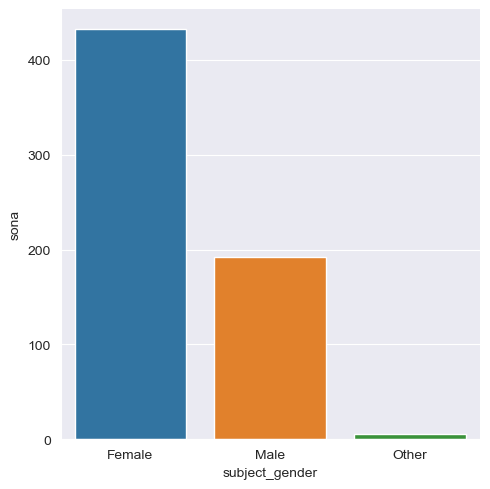

In [7]:
temp = studyII_GL

# Only keep the most recent 'subject'
temp = temp.drop_duplicates(subset=['subject'], keep='last')

# group total subjects by length
temp = temp.groupby(['subject_gender']).count().reset_index()
# plot
sns.catplot(y="sona", x="subject_gender", kind="bar", data=temp)

# Print number of subjects
print(temp[['sona','subject_gender']])

Average age and range of ages for each melody length:
  index  subject_age
0  mean    19.511218
1   min    17.000000
2   max    54.000000


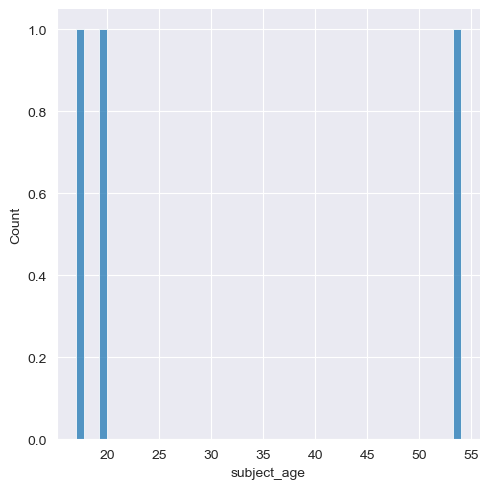

In [17]:
temp = studyII_GL
# Only keep the most recent 'subject'
temp = temp.drop_duplicates(subset=['subject'], keep='last')

# Only keep ages under 120
temp = temp[temp['subject_age'] < 120]

# Get average age and range of ages for each melody length
temp = temp.agg({'subject_age': ['mean', 'min', 'max']}).reset_index()

# Plot the age distribution
sns.displot(data=temp, x="subject_age", bins=50)


print("Average age and range of ages for each melody length:")
print(temp)



## Plots
### Number of subjects per set

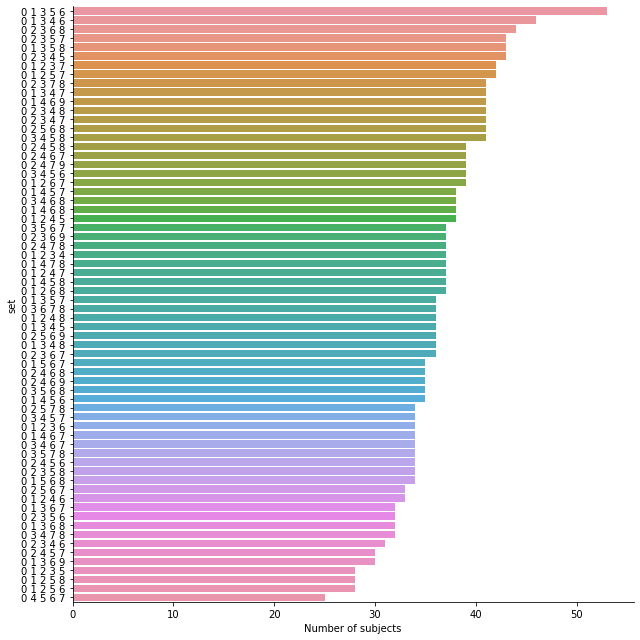

In [13]:
temp = studyII_GL.groupby('set').count().reset_index()
temp = temp.rename(columns={'subject':'Number of subjects'})
plot_order = temp.sort_values(by=["Number of subjects"], ascending=False)['set'].values
sns.catplot(y="set", x="Number of subjects", kind="bar", data=temp, order=plot_order, height=9)
plt.savefig(StudyII_paths.plots_dir + "subjects_per_set.svg")

### Avg. number of trials per set

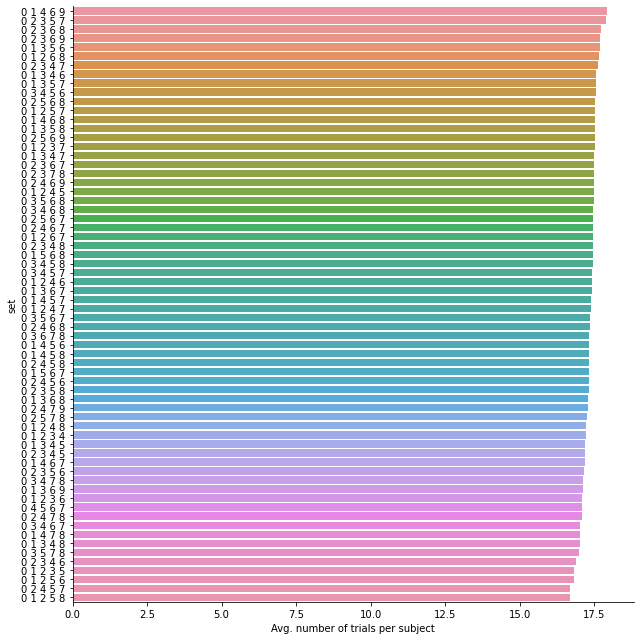

In [4]:
temp = studyII_GL.groupby('set').mean().reset_index()
temp = temp.rename(columns={'# trials':'Avg. number of trials per subject'})
plot_order = temp.sort_values(by=["Avg. number of trials per subject"], ascending=False)['set'].values
sns.catplot(y="set", x="Avg. number of trials per subject", kind="bar", data=temp, order=plot_order, height=9)
plt.savefig(StudyII_paths.plots_dir + "mean_trials_per_set.svg")

### Avg. number of trials per subject - When ignoring neither presses

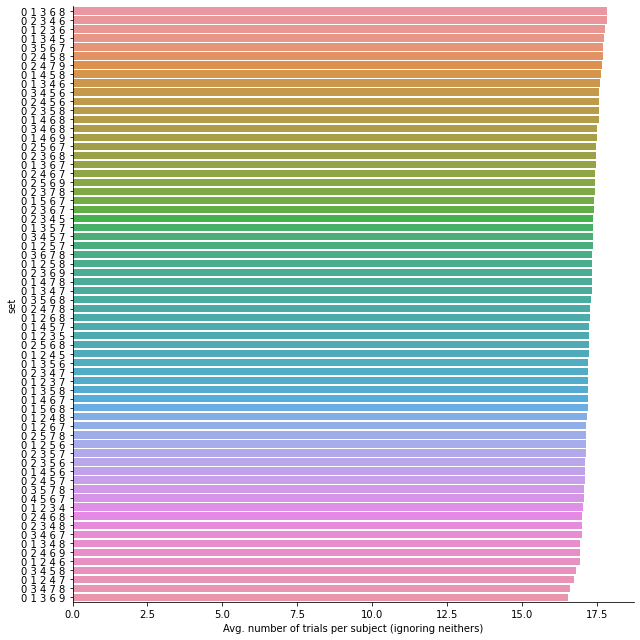

In [14]:
temp = studyII_GL.groupby('set').mean().reset_index()
temp = temp.rename(columns={'# no_neither_trials':'Avg. number of trials per subject (ignoring neithers)'})
plot_order = temp.sort_values(by=["Avg. number of trials per subject (ignoring neithers)"], ascending=False)['set'].values
sns.catplot(y="set", x="Avg. number of trials per subject (ignoring neithers)", kind="bar", data=temp, order=plot_order, height=9)
plt.savefig(StudyII_paths.plots_dir + "mean_trials_per_subject.svg")

### Distribution of button presses
1st - left button
neither - middle button
2nd - right button

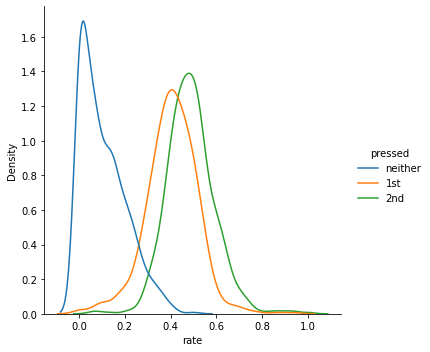

In [15]:
# Study II: Distribution of button presses
temp = studyII_GL[['subject', 'rate pressed neither (task)','rate pressed 1st (task)','rate pressed 2nd (task)']]
temp = temp.rename(columns={'rate pressed neither (task)':'neither','rate pressed 1st (task)':'1st','rate pressed 2nd (task)':'2nd'})
temp = temp.groupby('subject').mean().stack().reset_index()
temp = temp.rename(columns={'level_1':'pressed',0:'rate'})
sns.displot(data=temp, x="rate", hue="pressed",kind='kde')
plt.savefig(StudyII_paths.plots_dir + "dist_of_buttons.svg")

### Distribution of amount of "neither" presses across the task

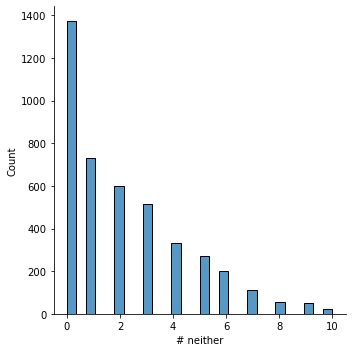

In [7]:
# Study II: Distribution of amount of neithers across the task
sns.displot(data=studyII_GL, x="# neither")
plt.savefig(StudyII_paths.plots_dir + "dist_of_neithers.svg")